# Credit Card Fraud Detection
Author: Brenda De Leon
## Overview
***
## Business Problem

According to estimates, e-commerce losses to online payment fraud were estimated at 41 billion U.S. dollars globally in 2022. The upward trend is expected to continue with the figure growing to 48 billion in 2023. [(Statista, 2022)](https://www.statista.com/statistics/1273177/ecommerce-payment-fraud-losses-globally/#statisticContainer)

E-commerce increased dramatically as a result of COVID-19 movement restrictions and fears. The convenience of online shopping continues to make consumers more reliant and retailers continue to find new ways to keep up with the demand. [Many small businesses](https://www.chargebackgurus.com/blog/contactless-payment-limits-increase) were pushed to enter the realm of e-commerce during the pandemic and are now reaching customers outside of their local area.

Unfortunately, there has also been an increase in fraudulent transactions for smaller and larger retailers and with that an increase in financial losses. Digital card-not-present or contactless transactions provide criminals easier opportunities for fraud. Credit card fraud can result in financial losses for e-commerce businesses, including chargebacks and other related expenses, which can ultimately affect their profitability and sustainability. These issues can be expensive and frustrating and are possibly magnified for small businesses. [Experts say](https://www.cnbc.com/2021/01/27/credit-card-fraud-is-on-the-rise-due-to-covid-pandemic.html) there are not enough regulations to protect smaller businesses from the chargebacks caused by fraudulent transactions.

E-commerce platforms such as [Shopify](https://www.shopify.com/) can protect their retailers from losses by incorporating data-based fraud prevention measures. 

Shopify has contracted us to build an accesible credit card fraud detection tool for their system to improve their sellers experience with their platform. We will provide Shopify with a machine learning model that can detect credit card fraud transactions by analyzing patterns to identify anomalies.

##### Defining Credit Card Fraud
We define credit card fraud as: the use of stolen credit card information to make unauthorized transactions online. One who performs credit card fraud can obtain the credit card information through various means, including hacking, phishing, account takeover,identity theft, or physically taking a card without permission. They can then use the stolen credit card information to make unauthorized purchases online.  
***
## Data
The credit card transaction dataset we used can be obtained [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?datasetId=310&sortBy=relevance). The dataset contains online transactions made in September 2013 over two days using European credit cards. The transactions are labeled as either fraudulent or non-fraudulent.

<b>Acknowledgements:</b> The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available at [Research Gate](https://www.researchgate.net/project/Fraud-detection-5) and the page of the [DefeatFraud](https://mlg.ulb.ac.be/wordpress/portfolio_page/defeatfraud-assessment-and-validation-of-deep-feature-engineering-and-learning-solutions-for-fraud-detection/) project.

<b>Data Understanding:</b> 
The primary role of this project is to learn about data imbalance. This dataset will allow me to explore techniques and tools to work with imbalanced data. 

<b>Data Limitations:</b> 
It is possible that there are mislabled transactions in both classes. Due to the confidential nature of financial data features have been annonymized. Moreover, due to privacy issues there are limited available datasets for credit card fraud detection.  
***
## Methods

    1. Load and Preprocess the data. Load data into a pandas DataFrame, preprocess it to remove duplicates, check for nulls, and detect outliers. Perform initial data exploration to get better understanding of data. 

    2. Exploratory Data Analysis, we will visualize the data to get insights into the features. We will compare the distributions of each feature.
    
    3. Data Split. Split data into training, validation, and test sets. Training set is used to train machine learnign model, training set is used to evaluate performance of models during training, and the test set is used to evaluate final performance. It is important that the class distribution is preserved across the sets.
    
    4. Build and Evaluate a Baseline Model. A baseline model will help establish a benchmark to compare the performance of other models. 

    5. Iteratively Perform and Evaluate Imbalance Techniques. Investigate different algorithms and techniques to determine whether they should be part the final model. Evaluate the model's performance using various metrics, mainly recall  as well as F1 score and ROC-AUC. We will check that the model can detect fraud (true positives) without producing too many false positives.

    6. Evaluate a Final Model on the Test Set. Fine tune hyper-parameters of the final model to optimize perofrmnace. Interpret final model to understand how it is making predictions and which features are most important. 

***
### Libraries

Here are libraries we used to work on this project.

In [343]:
# importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib import gridspec
import plotly.figure_factory as ff
import plotly.graph_objects as go
plt.style.use('ggplot')

In [344]:
# importing dataset
df = pd.read_csv('data/creditcard.csv')
# previewing first 5 rows and last 5 rows of the dataset
df.head().append(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0
1,0.0,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0
2,1.0,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0
3,1.0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0
4,2.0,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0
284802,172786.0,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,...,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.77,0
284803,172787.0,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,...,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.79,0
284804,172788.0,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,...,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.88,0
284805,172788.0,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,...,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.00,0
284806,172792.0,-0.533,-0.190,0.703,-0.506,-0.013,-0.650,1.577,-0.415,0.486,...,0.261,0.643,0.377,0.009,-0.474,-0.818,-0.002,0.014,217.00,0


In [345]:
# viewing columns, # of columns, dtypes, # of rows, # of non nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<b>Notes:</b> There are 284,807 rows and 31 columns. The dataset is made up of only numerical features. There are no null values to deal with. 'Amount' and 'Time' are straight forward. 'Class' is the target and provides the labels for each transaction, with 1 representing a fraudulent transaction and 0 a non-fraudulent transaction. The 28 columns (V1 - V28) represent confidential information, more details about the data are not available. The datasource states that these 28 features are the principle components obtained by principal component analysis (PCA). PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

The dataset is highly imbalanced with only 492 of the total 284,807 transactions labeled as fraudulent. 

### Duplicates
We will check for duplicates and remove them. We will check the dataset shape to confirm their removal. 

In [346]:
# checking for duplicates and df shape 
print(df.duplicated().sum())
df.shape

1081


(284807, 31)

In [347]:
# dropping the duplicates
df.drop_duplicates(subset=None, inplace=True)
# checking for duplicates and df shape 
print(df.duplicated().sum())
df.shape

0


(283726, 31)

It seems the duplicates are not intentional. 

In [348]:
# saving final df as a new csv file.
df.to_csv('data/clean_df.csv',index=False)

### Correlation
Checking for multicolinearity amongst the features in the data. 

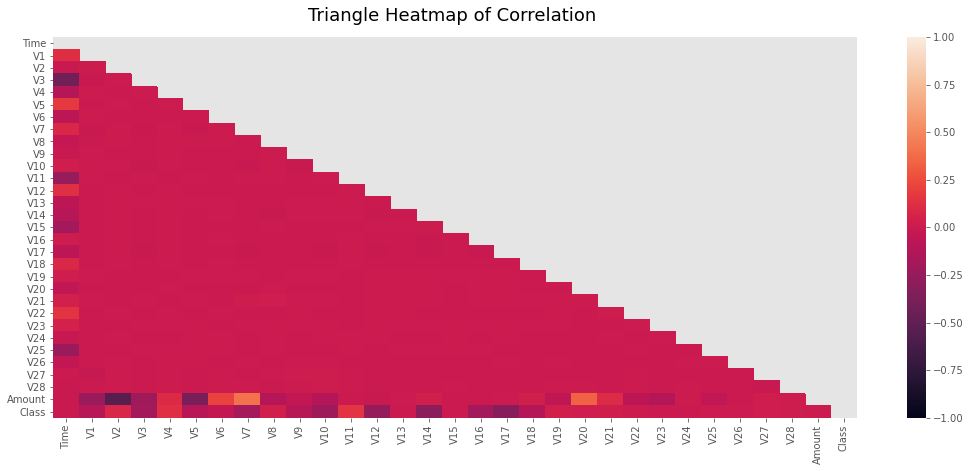

In [349]:
# setting figure size
plt.figure(figsize=(18,7))
# creating heatmap 
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, linecolor='black')
heatmap.set_title('Triangle Heatmap of Correlation ', fontdict={'fontsize':18}, pad=16);

With no significantly lighter box in the correalation heatmap, we are interpreting that there is no multicolinearity or strong correalation amongst the features in the dataset. 

### Target
We will explore the target which labels each transaction as fraudulent or non-fraudulent.

In [350]:
# checking proportions of target
df.Class.value_counts(normalize=True)

0    0.998
1    0.002
Name: Class, dtype: float64

In [351]:
# creating seperate dataframes for fraudulent and non fraudulent transactions
data_fraud = df[df['Class'] == 1]
# non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

In [352]:
# there is high imbalance in our target
print("Fraudulent Transactions: " + str(len(data_fraud)))
print("Non-Fraudulent Transactions: " + str(len(data_non_fraud)))
print("Proportion of Fraudulent Cases: " + str(len(data_fraud)/ df.shape[0]))

Fraudulent Transactions: 473
Non-Fraudulent Transactions: 283253
Proportion of Fraudulent Cases: 0.001667101358352777


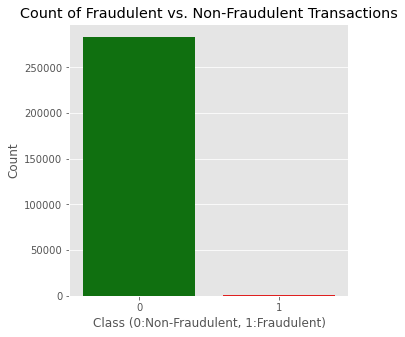

In [353]:
# visually comparing number of fraud and normal transactions 
counts = df.Class.value_counts()
# use green for bar with max value and red for minority
color = ['red' if (x < max(counts)) else 'green' for x in counts]
# setting figure size
plt.figure(figsize=(5,5))
# create barplot using specified colors
sns.barplot(x=counts.index, y=counts, palette=color)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)');

<b>Notes:</b> We are dealing with a target that is heavily imbalanced with only 0.0017% of the transactions designated as fraud. 

<b>Next:</b> We will exlore the remaining features, first focusing on the two features not produced by PCA: 'Time' and 'Amount'

### Time
Defined as: 
"Number of seconds elapsed between this transaction and the first transaction in the dataset"

The values are in seconds, the higher the second amount, the further away the transaction took place from the first transaction.

For reference: 

1 hour = 3600 seconds

24 hours = 86400 seconds

In [354]:
# inspecting values
df.Time.value_counts()

3767.0      21
3770.0      20
3750.0      19
19912.0     19
3766.0      17
            ..
4919.0       1
119950.0     1
56235.0      1
93647.0      1
151841.0     1
Name: Time, Length: 124592, dtype: int64

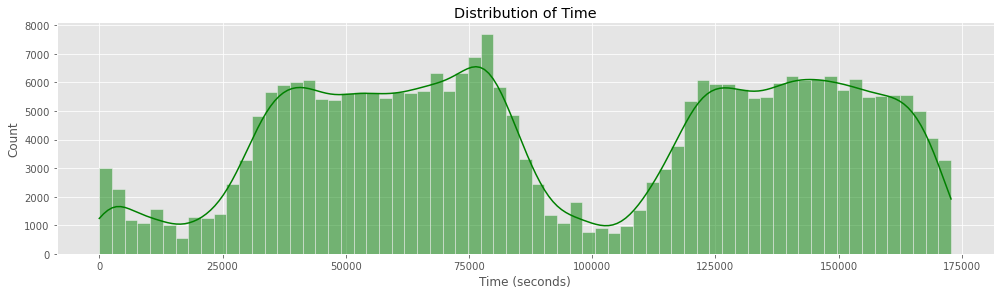

In [355]:
# visually inspecting time
sns.displot(df.Time, 
            height=4, 
            aspect=3.5, 
            kde=True,
            color='green').set(title='Distribution of Time').set(xlabel='Time (seconds)');

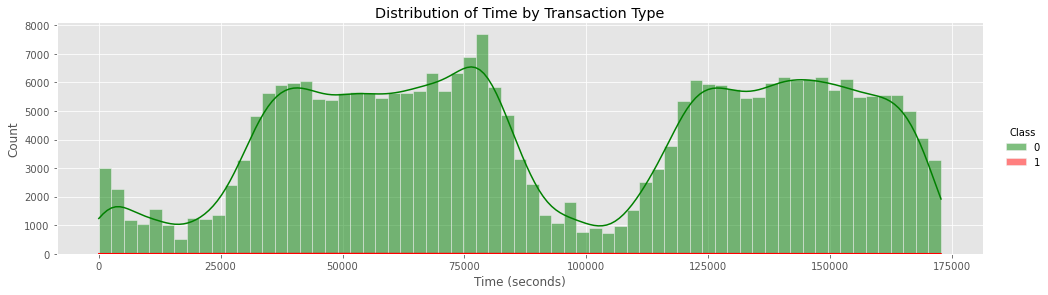

In [356]:
# visually inspecting distribution of time by transaction type
sns.displot(data=df, 
            x='Time', 
            hue='Class', 
            # specifiying colors for each class
            palette=['green', 'red'],
            kde=True, 
            fill=True, 
            height=4, 
            aspect=3.5).set(title='Distribution of Time by Transaction Type').set(xlabel='Time (seconds)');

<b>Notes:</b> We can see that the distribution of time has valleys and peaks. It is hard to determine what times the changes are occuring since the x axis is in seconds. Since the plot is using count and there are very few fraudulent transactions, it is hard to even see the red representing the fraudulent transactions in the second plot. 

<b>Next:</b> We will plot measuring density instead of by count to better inspect time patterns of the fraudulent transactions. We will also change the time measurement from seconds to hours for better  interpretability. 

#### Time by Hour
We will calculate to confirm that the data covers a span of two days or forty eight hours and create a new column to represent the hour the transaction took place. Currently the transaction time is represented in seconds. We will see if more patterns can be picked up by including an hour representation for easier reference.

In [357]:
# 1 hour = 3600 seconds
# (max time value / seconds in an hour) for number of hours elapsed since first transaction
df.Time.max()/3600

47.99777777777778

In [358]:
# applying lambda function to each variable of time column to create a new hour column
df['Hour'] = df['Time'].apply(lambda x: np.floor(x/3600))

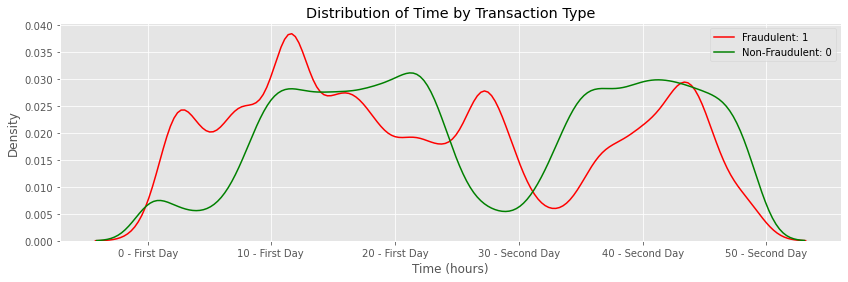

In [359]:
# visually inspect classes by density and hour
data_plot = df.copy()
# specify column to use
column = 'Hour'
# create plot
plt.figure(figsize=(14, 4))
sns.kdeplot(data_plot[column][data_plot.Class == 1], shade=False, label='Fraudulent: 1', color='red', 
            # adjusting to smaller bandwith to compensate for density scaling
            bw_method=0.1)
sns.kdeplot(data_plot[column][data_plot.Class == 0], shade=False, label='Non-Fraudulent: 0', color='green', 
            bw_method=0.1)
plt.xlabel('Time (hours)')
plt.title('Distribution of Time by Transaction Type')
plt.legend()
# set x tick labels
xticks = np.linspace(0, 48, 6)
xticklabels = ['0 - First Day', '10 - First Day ', '20 - First Day', '30 - Second Day', '40 - Second Day', '50 - Second Day']
plt.xticks(xticks, xticklabels)
plt.show();

<b>Notes:</b> By displaying the density instead of count we are better able to see the distributions of both classes in the same plot. It seems that the x-axis is being scaled to density since we are now plotting by density values instead of the raw counts. This is causing the x-axis limits to extend beyond the actual range. The negative plotting and plotting beyond forty eight is due to the density scaling. We are able to adjust the bandwith of x-axis to compensate for the density scaling. By making the bandwith smaller we can capture fine-grained patterns since larger bandwidth results in a smoother, more generalized representation. [(seaborn)](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

Now we are better able to pick up that fraudulent transaction activity starts before non-fraudulent transaction activity. The fraud activity generally follows a similar pattern of more activity in the day time than the late hours of the night/ early morning hours. The non-fraudulent transaction activity is also less peakier and seems like it has a more stable pattern.

<b>Next:</b> We will visualize each class seperately.

In [360]:
# updating seperate dataframes to include hour column
data_fraud = df[df['Class'] == 1]
# non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

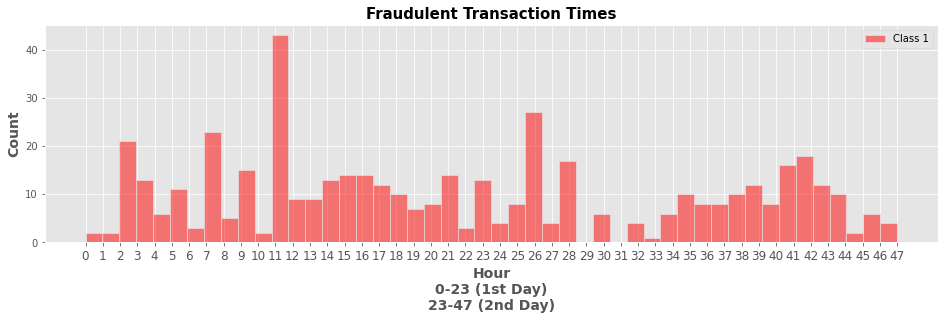

In [361]:
# visually inspect fraudulent transaction times
data_plot = df.copy()

# specify column to use
column = 'Hour'

# create plot
plt.figure(figsize=(16, 4))
sns.histplot(data_plot[column][data_plot.Class == 1], label='Class 1', alpha=0.5, color='r', bins=48)
plt.xlabel(column)
plt.title('Fraudulent Transaction Times', weight='bold', fontsize=15)
plt.legend()
# generate list of x-ticks
xticks = range(0, 48, 1)
# set x ticks for each bin
plt.xticks(xticks, fontsize=12)
plt.xlabel('Hour\n0-23 (1st Day)\n23-47 (2nd Day)', weight='bold', fontsize=14)
plt.ylabel('Count', weight='bold', fontsize=14)
plt.show();

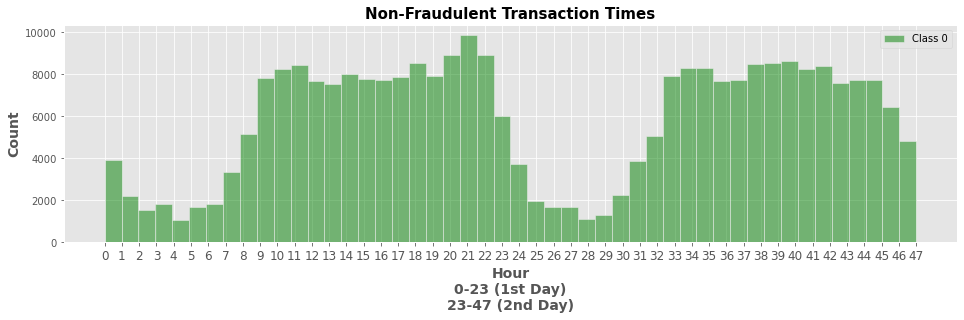

In [362]:
# visually inspect non-fraudulent transaction times
# create plot
plt.figure(figsize=(16, 4))
sns.histplot(data_plot[column][data_plot.Class == 0], label='Class 0', alpha=0.5, color='g', bins=48)
plt.xlabel(column)
plt.title('Non-Fraudulent Transaction Times', weight='bold', fontsize=15)
plt.legend()
# generate list of x-ticks
xticks = range(0, 48, 1)
# set x ticks for each bin
plt.xticks(xticks, fontsize=12)
plt.xlabel('Hour\n0-23 (1st Day)\n23-47 (2nd Day)', weight='bold', fontsize=14)
plt.ylabel('Count', weight='bold', fontsize=14)
plt.show();

In [363]:
# inspecting describe summaries of time and hour 
pd.set_option('precision', 3)
df[['Time','Hour']].describe()

,Time,Hour
count,283726.000,283726.000
mean,94811.078,25.845
std,47481.048,13.183
min,0.000,0.000
25%,54204.750,15.000
50%,84692.500,23.000
75%,139298.000,38.000
max,172792.000,47.000


<b>Notes:</b> The transaction times represented in hours are more accesible. We can see that the dips occur in the early morning hours and late night hours. Between 2-4 AM are some of the least common times for non-fradulent transactions, however those hours represent some of the peaks for fradulent transactions.

<b>Next:</b> We will explore 'Amount'.

### Amount

Defined as: "Transaction amount"

In [364]:
# inspecting values
df.Amount.value_counts()

1.00       13566
1.98        6044
0.89        4871
9.99        4738
15.00       3280
           ...  
362.97         1
241.71         1
462.78         1
337.41         1
1080.06        1
Name: Amount, Length: 32767, dtype: int64

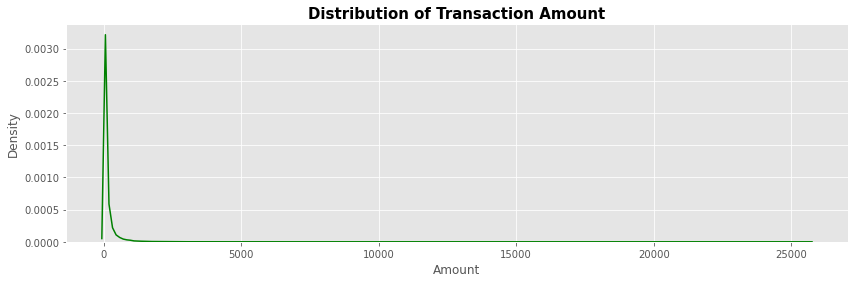

In [365]:
# visually inspecting amount
plt.figure(figsize=(14, 4))
# specifying values
amount_values = df['Amount'].values 
sns.kdeplot(amount_values, color='g').set_title('Distribution of Transaction Amount', 
                                 weight='bold', 
                                 fontsize=15)
plt.xlabel('Amount')
plt.show();

In [366]:
# inspecting describe summary of amount
pd.set_option('precision', 3)
df[['Amount']].describe()

,Amount
count,283726.000
mean,88.473
std,250.399
min,0.000
25%,5.600
50%,22.000
75%,77.510
max,25691.160


<b>Notes:</b> The average transaction was at the amount of 88. This explains the right skewed distribution of the plot. The max transaction amount is at 25,691.160. Most transactions are relatively of smaller amounts. There are outliers of over 25,000. 
   
<b>Next:</b> We will explore the distribution of amount by transaction type. 

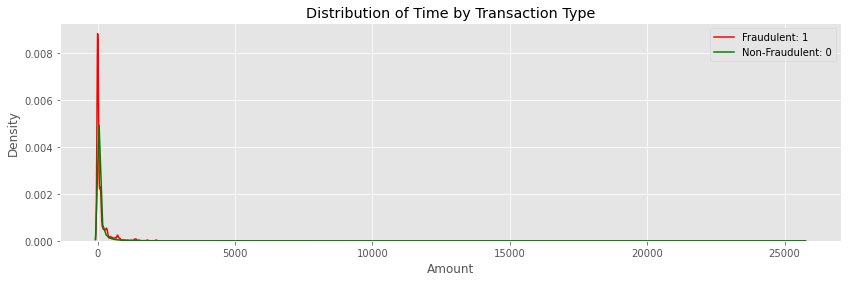

In [367]:
# visually inspect classes by density and amount
# specify column to use
column = 'Amount'
# create plot
plt.figure(figsize=(14, 4))
sns.kdeplot(data_plot[column][data_plot.Class == 1], shade=False, label='Fraudulent: 1', color='red', 
            # adjusting to smaller bandwith to compensate for density scaling
            bw_method=0.1)
sns.kdeplot(data_plot[column][data_plot.Class == 0], shade=False, label='Non-Fraudulent: 0', color='green', 
            bw_method=0.1)
plt.xlabel('Amount')
plt.title('Distribution of Time by Transaction Type')
plt.legend()
plt.show();

<b>Notes:</b> We can see that a larger proportion of the fraudulent transactions are of one of the lowest amounts in the plot. The transactions of larger amounts did not occur as often.

The average transaction was at the amount of 88. This explains the right skewed distribution of the plot. The max transaction amount is at 25,691.160. Most transactions are relatively of smaller amounts. There are outliers of over 25,000. 
   
<b>Next:</b> We will take a closer look and explore the amount feature of each class and its distribution.

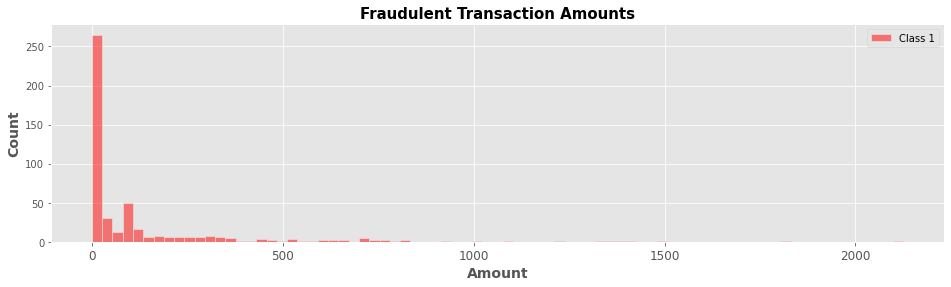

In [368]:
# visually inspect fraudulent transaction amounts
data_plot = df.copy()

# specify column to use
column = 'Amount'

# create plot
plt.figure(figsize=(16, 4))
sns.histplot(data_plot[column][data_plot.Class == 1], label='Class 1', alpha=0.5, color='r')
plt.xlabel(column)
plt.title('Fraudulent Transaction Amounts', weight='bold', fontsize=15)
plt.legend()
# set x ticks for each bin
plt.xticks(fontsize=12)
plt.xlabel('Amount', weight='bold', fontsize=14)
plt.ylabel('Count', weight='bold', fontsize=14)
plt.show();

In [369]:
# distribution summary of the amount feature  
pd.set_option('precision', 3)
print('Summary of: FRAUDULENT AMOUNT' + '\n----------------------------')
print(data_fraud['Amount'].describe())

Summary of: FRAUDULENT AMOUNT
----------------------------
count     473.000
mean      123.872
std       260.211
min         0.000
25%         1.000
50%         9.820
75%       105.890
max      2125.870
Name: Amount, dtype: float64


<b>Notes:</b> We can see that most of the fraudulent transactions are relatively low. 
The fraudulent transaction amounts have a right skewed distribution. The max transaction amount is at 2,125.87 which is significantly smaller than the overall max amount. 
   
<b>Next:</b> We will explore non-fraudulent transaction amounts.

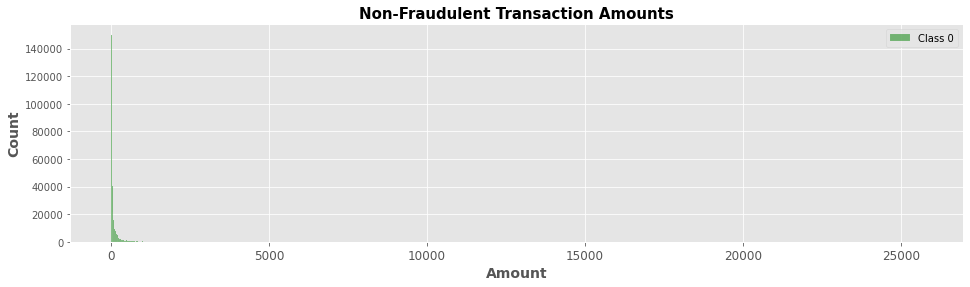

In [370]:
# create plot
plt.figure(figsize=(16, 4))
sns.histplot(data_plot[column][data_plot.Class == 0], label='Class 0', alpha=0.5, color='g', bins=1000)
plt.xlabel(column)
plt.title('Non-Fraudulent Transaction Amounts', weight='bold', fontsize=15)
plt.legend()
# set x ticks for each bin
plt.xticks(fontsize=12)
plt.xlabel('Amount', weight='bold', fontsize=14)
plt.ylabel('Count', weight='bold', fontsize=14)
plt.show();

In [371]:
# distribution summary of the amount feature  
pd.set_option('precision', 3)
print('Summary of: NON FRAUDULENT AMOUNT' + '\n----------------------------')
print(data_non_fraud['Amount'].describe())

Summary of: NON FRAUDULENT AMOUNT
----------------------------
count    283253.000
mean         88.414
std         250.379
min           0.000
25%           5.670
50%          22.000
75%          77.460
max       25691.160
Name: Amount, dtype: float64


<b>Notes:</b> We can see that most of the non-fraudulent transactions are relatively low. 
The non-fraudulent transaction amounts also have a right skewed distribution. The max transaction amount is at 25,691.16 which is significantly larger than the max fraudulent transaction amount. Because non-fraudulent transactions do reach higher amount nubmers the scale of this plot is larger than that of the fraudulent amounts. In this data, no fraudulent transactions are made that are larger than 2,126.00

In [372]:
# calculating average of all transactions
print("Average Fraudulent Transaction Amount:  $ " + str('%.4f' % data_fraud['Amount'].mean()))
print("Average Valid Transaction Amount:  $ " + str('%.4f' % data_non_fraud['Amount'].mean()))
print("Average Transaction Amount:  $ " + str('%.4f' % df['Amount'].mean()))

Average Fraudulent Transaction Amount:  $ 123.8719
Average Valid Transaction Amount:  $ 88.4136
Average Transaction Amount:  $ 88.4727


<b>Notes:</b> The average fradulent transaction amount at 122.21 is higher than the average non-fradulent transaction amount of 88.29. This highlights the importantance of detecting fraud transactions. The presence of the fradulent transactions causes the average transaction amount to slightly increase.

<b>Next:</b> We will explore the outliers to decide how to handle them.

### Outliers
We can see that there are significant outliers in 'Amount'. We will take a closer look at them here to decide how to handle them. 

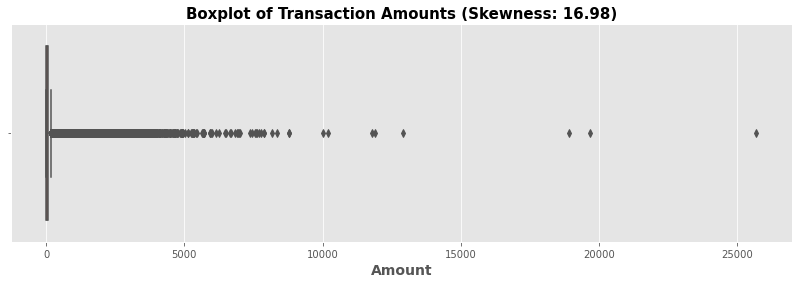

In [373]:
# create plot to visualize outliers
plt.figure(figsize=(14,4))
sns.boxplot(x='Amount', data=df, orient='h')
plt.xlabel('Amount', weight='bold', fontsize=14)
plt.title(f'Boxplot of Transaction Amounts (Skewness: {skew(df["Amount"]):.2f})', weight='bold', fontsize=15)
plt.show();


<b>Notes:</b> Removing outliers is a common preprocessing step. Outliers can negatively affect the performance of a model by making it difficult for the model to identify patterns and make accurate predictions. Sometimes the outliers are caused by error and should be looked into. Removing the outliers normalizes the data and makes it easier for the model to learn the underlying patterns. 

However, removing outliers is not always appropriate. We can lose valid and significant data points and miss out on important information. It is important to consider the impact of removing outliers. 

In 'Amount' it is reasonable that all of the transaction amounts were legit. Importantly, it could be that the outliers are of great importance to detecting and preventing fraud. Fraudulent transactions are inherently rare events that may be flagged as outliers. Additionally, fraud tacticts are constantly changing and removing any data points that may be considered outliers can prevent us from picking up on any new types of fraud patterns that may be emerging. 

Therefore, we are using outlier detection and analysis techniques rathern than outlier removal. We will test other techniques such as scaling to help the model deal with the outliers without losing important information.

<b>Next:</b> We will explore the remaining features.

## Other Features
The other 28 features are principal components. Visualize their distributions also by transaction type. 

In [383]:
# visually inspect 28 other features 
import plotly.express as px
# using PCA to reduce the dimensionality of all features down to 2/3 dimensions
from sklearn.decomposition import PCA
# specify columns to use
pca_columns = df.iloc[:,1:29]
# numpy array y containing the labels of each
y = df.iloc[:,30]
# specify dimensionality
pca = PCA(n_components=3)  # for 2D
X_pca = pca.fit_transform(df.iloc[:, 1:29])

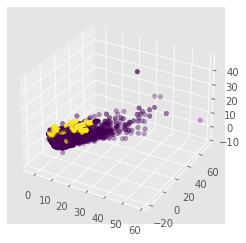

In [384]:
# plot in 3D with different colors for each label
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y)
plt.show()


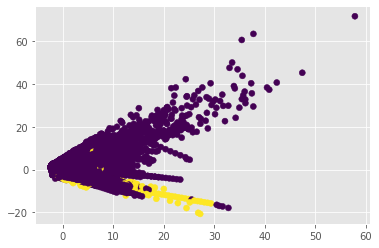

In [382]:
# plot in 2D with different colors for each label
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

In [385]:
# interactive 3D plot
# creating new df to store the reduced data
# df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
# df_pca['Label'] = df.iloc[:, 30]

# # creating 3D scatter plot with different colors for each label
# fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='Label')
# fig.show()

<b>Notes:</b> The scatter plot shows the distribution of the data points in three dimensions after the dimensionality reduction through PCA. We can see that there is placement distinction amongst the different labels. Points that are closer together suggest that there are similar underlying features. We can see that the overall shape of the data is not drastically scattered. We can see that without the differentiation in color, the fraudulent transactions would be able to camouflage as a non-fraudulent transaction to the naked eye. 

The interactive plot took too much space, uncomment the code to engage with an interactive 3D plot of the principal components. 

<b>Next:</b> We will inspect the distributions of each of the remaining 28 features.

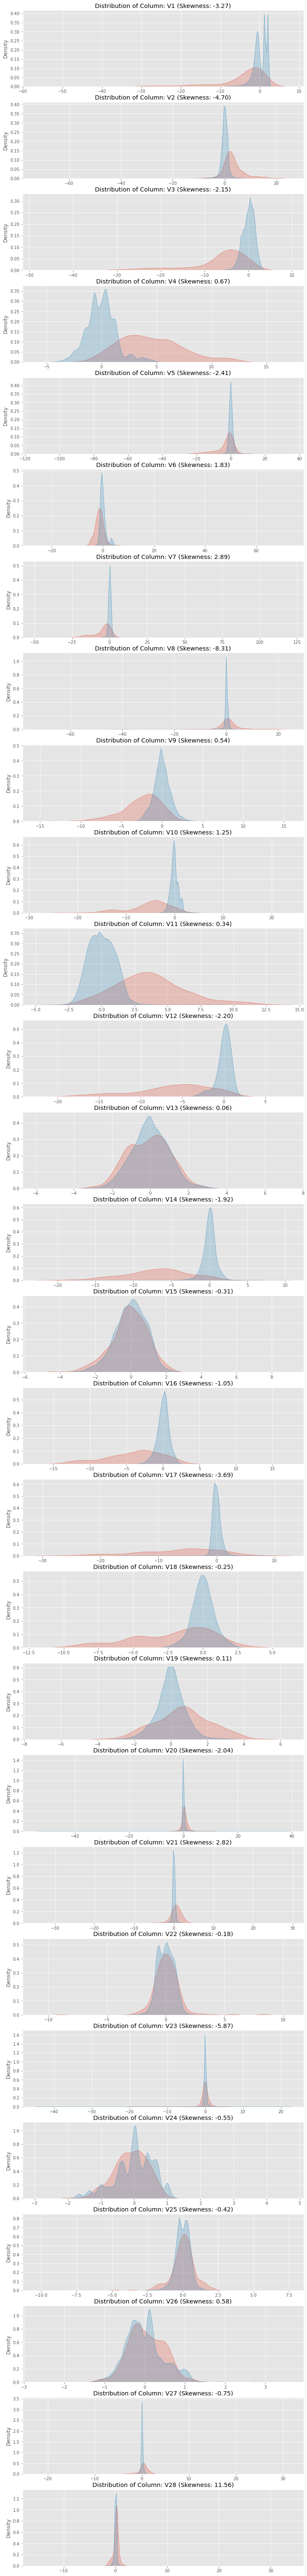

In [376]:
# visually inspect 28 other features 
data_plot = df.copy()
# specify columns to use
columns = data_plot.iloc[:,1:29].columns

#
plt.figure(figsize=(12, 30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
    ax = plt.subplot(grids[grid])
    sns.kdeplot(data_plot[index][data_plot.Class == 1], shade=True, ax=ax, label='Class 1')
    sns.kdeplot(data_plot[index][data_plot.Class == 0], shade=True, ax=ax, label='Class 0')
    ax.set_xlabel("")
    ax.set_title(f"Distribution of Column: {index} (Skewness: {skew(df[index]):.2f})")
plt.show();

<b>Notes:</b> Generally, if the skewness value is less than -1 or greater than 1, the distribution is considered highly [skewed](https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html#:~:text=A%20skewness%20value%20greater%20than,the%20distribution%20is%20fairly%20symmetrical.). Several of the features are highly skewed, these include: V1, V2, V3, V5, V6, V7, V8, V12, V14, V17, V20, V21, V23, and V28. At least half of the 28 principal component features would be considered highly skewed. 

The assume that the 28 anonymized columns have gone through some standardization before having been transformed through PCA. We will leave these features as is.

<b>Next:</b> Our next steps are testing methods to deal with severe imbalance and testing out different algorithms and using pipelines to build a high performing model. We will continue in a different notebook.